In [2]:
# Imports

import numpy as np
import pandas as pd
import os
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import threading
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./Dataset/Dataset.csv')
#msno.matrix(data)

In [4]:
data.head()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,60.0,100.0,37.35,121.5,66.5,43.5,14.0,NaN,...,NaN,69.0,81.12,1,0.0,1.0,-42.55,4,0,19278
1,1,1,112.5,99.0,37.55,108.0,67.0,51.0,12.0,NaN,...,NaN,NaN,81.12,1,0.0,1.0,-42.55,5,0,19278
2,2,2,99.0,100.0,37.70,130.5,81.0,63.0,16.0,NaN,...,NaN,NaN,81.12,1,0.0,1.0,-42.55,6,0,19278
3,3,3,80.0,100.0,37.70,142.0,81.5,56.5,22.5,NaN,...,NaN,NaN,81.12,1,0.0,1.0,-42.55,7,0,19278
4,4,4,80.0,98.0,37.90,155.0,88.0,63.0,29.0,NaN,...,NaN,NaN,81.12,1,0.0,1.0,-42.55,8,0,19278


In [5]:
data.columns

Index(['Unnamed: 0', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP',
       'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2',
       'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [6]:
impute_data = data.drop(data.columns[0], axis=1)
impute_data = impute_data.drop('SepsisLabel', axis=1)
impute_data = impute_data.drop('Unit1', axis=1)
impute_data = impute_data.drop('Unit2', axis=1)
impute_data.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'HospAdmTime', 'ICULOS',
       'Patient_ID'],
      dtype='object')

In [7]:
import random       
def worker(index, r):
    imp_mean = IterativeImputer(random_state=r, max_iter=40, missing_values=np.nan, verbose=2)
    imputed_data = imp_mean.fit_transform(impute_data)
    imputed_df = pd.DataFrame(imputed_data, columns=imp_mean.get_feature_names_out())
    imputed_df.to_csv('imputed_data_' + str(index) + '.csv')
    
threads =[]

for i in range(2):
    r = random.randint(0, 2000)
    print(r)
    threads.append(threading.Thread(name='worker_' + str(i), target=worker, args=[i, r]))

for w in threads:
    w.start()
    
for w in threads:
    w.join()


1401
1568
[IterativeImputer] Completing matrix with shape (790215, 39)
[IterativeImputer] Completing matrix with shape (790215, 39)
[IterativeImputer] Ending imputation round 1/40, elapsed time 122.26
[IterativeImputer] Ending imputation round 1/40, elapsed time 123.09
[IterativeImputer] Change: 8962.00622451586, scaled tolerance: 20.643 
[IterativeImputer] Change: 8962.00622451586, scaled tolerance: 20.643 
[IterativeImputer] Ending imputation round 2/40, elapsed time 240.35
[IterativeImputer] Ending imputation round 2/40, elapsed time 240.38
[IterativeImputer] Change: 4533.707770378451, scaled tolerance: 20.643 
[IterativeImputer] Change: 4533.707770378451, scaled tolerance: 20.643 
[IterativeImputer] Ending imputation round 3/40, elapsed time 376.31
[IterativeImputer] Ending imputation round 3/40, elapsed time 377.07
[IterativeImputer] Change: 1042.1958572757935, scaled tolerance: 20.643 
[IterativeImputer] Change: 1042.1958572757935, scaled tolerance: 20.643 
[IterativeImputer] End

In [13]:
imputed_data = pd.read_csv('imputed_data_0.csv')

In [14]:
imputed_data['SepsisLabel'] = data['SepsisLabel']
imputed_data.head()
imputed_data.to_csv('imputed_data.csv')

In [15]:
imputed_data = pd.read_csv('imputed_data.csv')
imputed_data.head()

,Unnamed: 0,Unnamed: 0.1,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,...,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,ICULOS,Patient_ID,SepsisLabel
0,0,0,0.0,60.0,100.0,37.35,121.5,66.5,43.5,14.0,...,43.400000,14.346401,188.184178,69.000000,81.12,1.0,-42.55,4.0,19278.0,0
1,1,1,1.0,112.5,99.0,37.55,108.0,67.0,51.0,12.0,...,37.421746,14.458816,337.563532,181.192615,81.12,1.0,-42.55,5.0,19278.0,0
2,2,2,2.0,99.0,100.0,37.70,130.5,81.0,63.0,16.0,...,33.349045,13.687711,389.271834,212.817021,81.12,1.0,-42.55,6.0,19278.0,0
3,3,3,3.0,80.0,100.0,37.70,142.0,81.5,56.5,22.5,...,34.499934,12.204901,379.959405,195.066147,81.12,1.0,-42.55,7.0,19278.0,0
4,4,4,4.0,80.0,98.0,37.90,155.0,88.0,63.0,29.0,...,31.503023,11.205882,441.508456,227.294221,81.12,1.0,-42.55,8.0,19278.0,0


In [16]:
def plot_imputed_patient(patient_id):
    imputed_patient = imputed_data[imputed_data['Patient_ID'] == patient_id]
    data_patient = data[data['Patient_ID'] == patient_id]
    fig, ax = plt.subplots(int(len(data_patient.columns)**0.5) + 1, int(len(data_patient.columns)**0.5) + 1, figsize=(10,7))
    fig.tight_layout()
    x = 0
    y = 0
    for c in data_patient.columns:
        if c in imputed_patient.columns:
            ax[x,y].plot(imputed_patient[c], 'r--')
            ax[x,y].plot(data_patient[c])
            ax[x,y].title.set_text(c)
            y += 1
            if y > len(ax) - 1:
                y = 0
                x += 1
    plt.show()


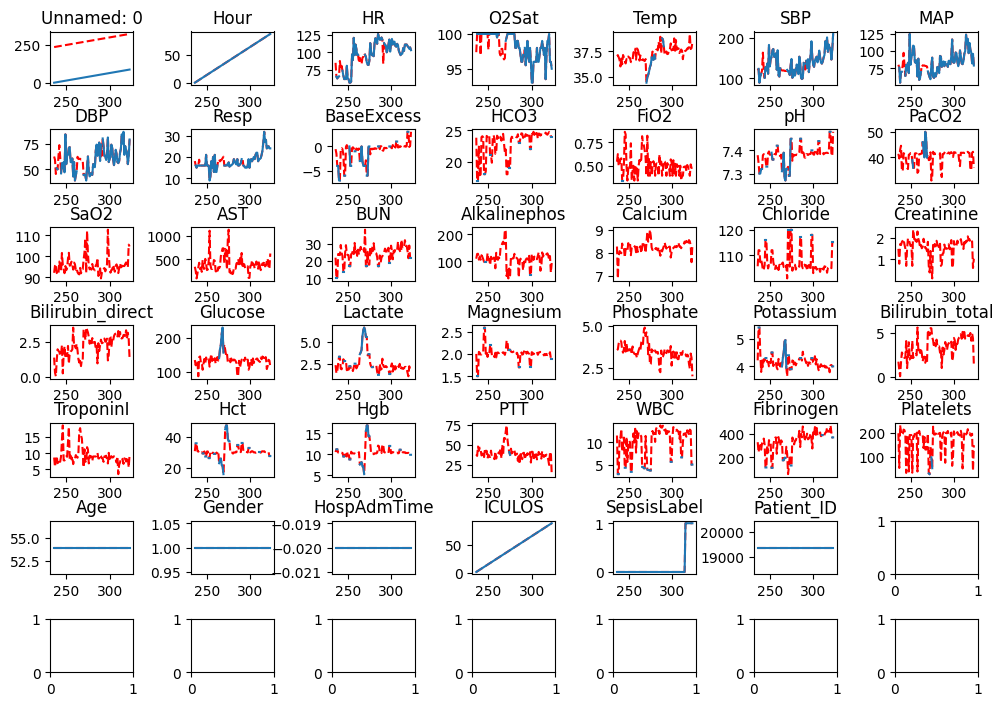

In [17]:
plot_imputed_patient(19375)

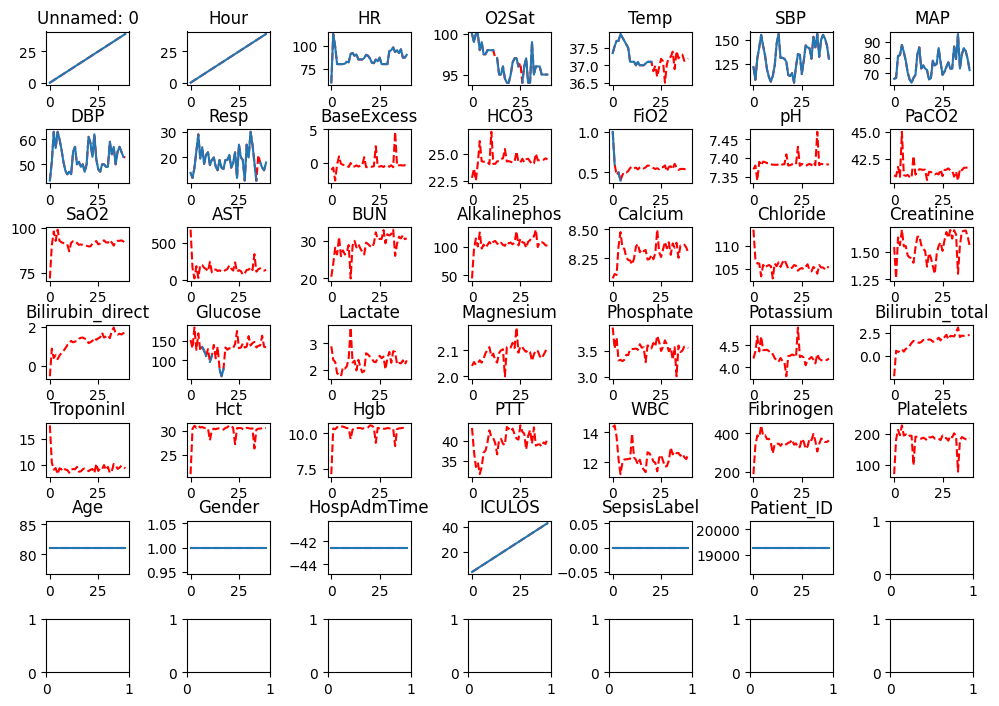

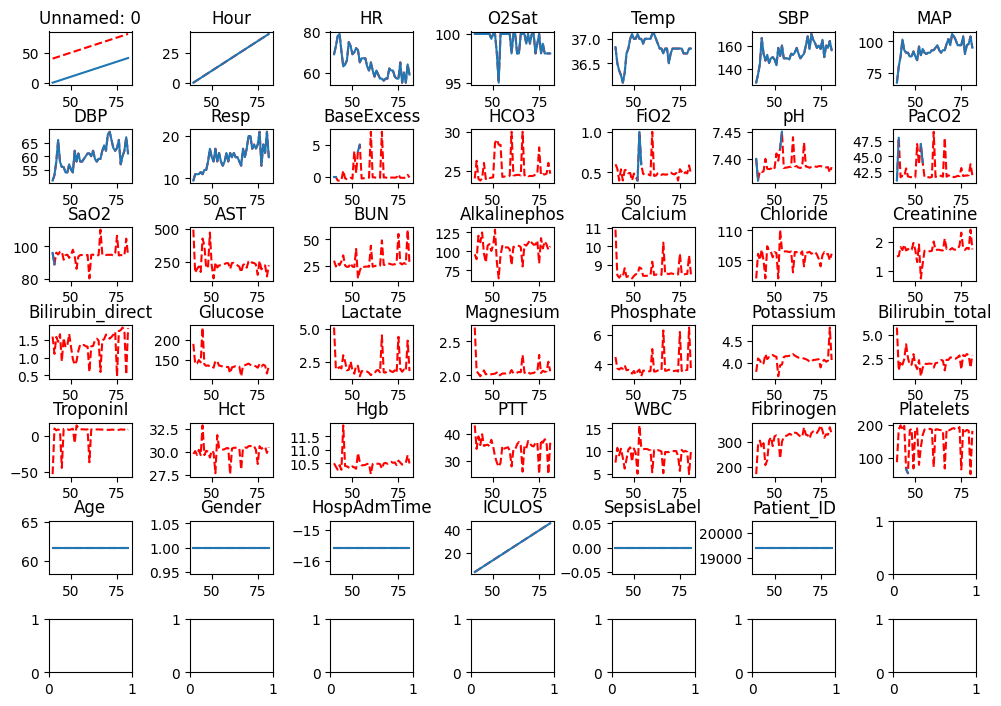

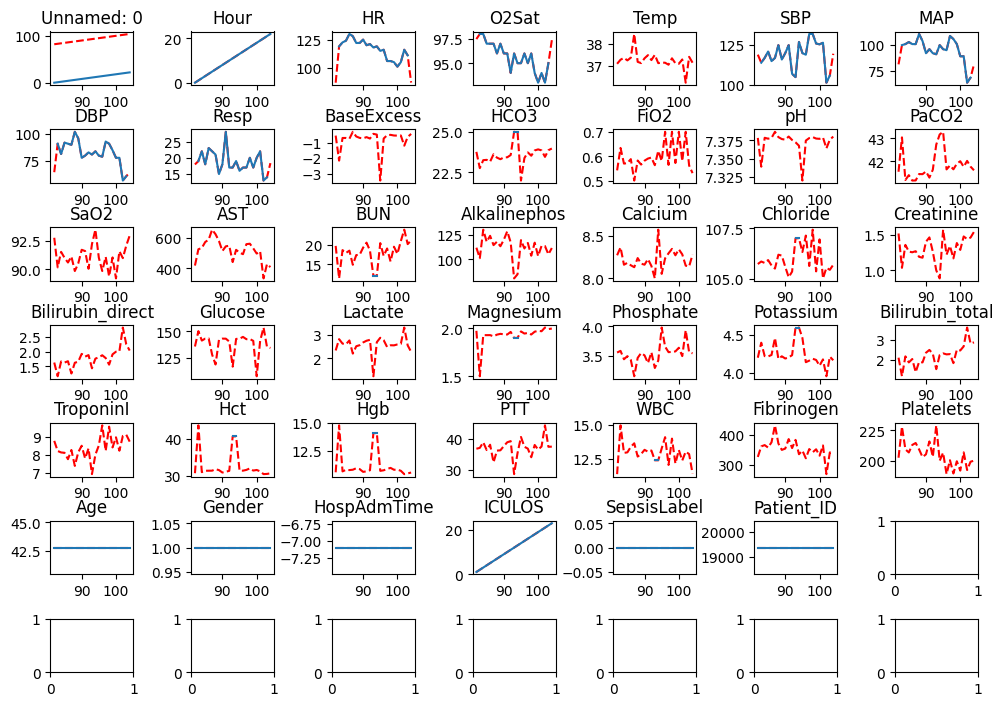

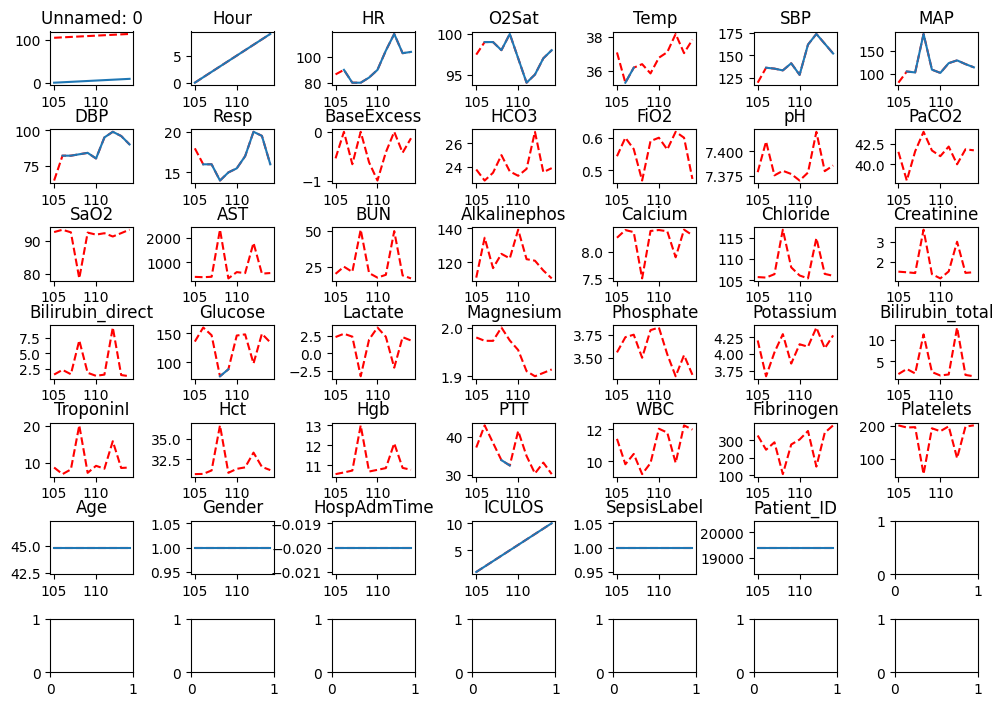

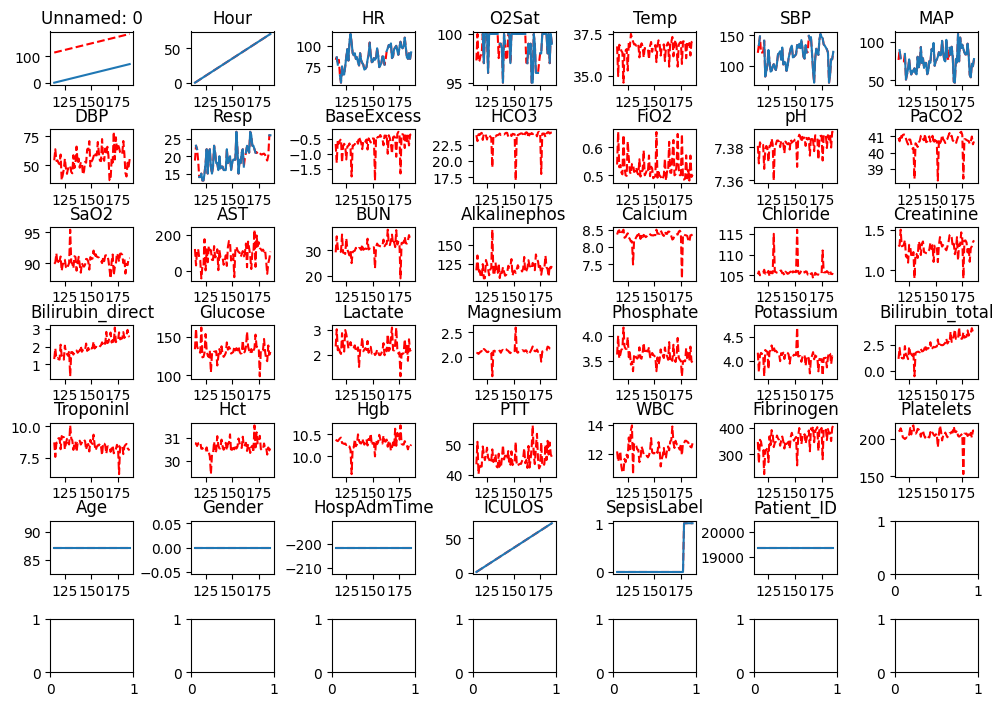

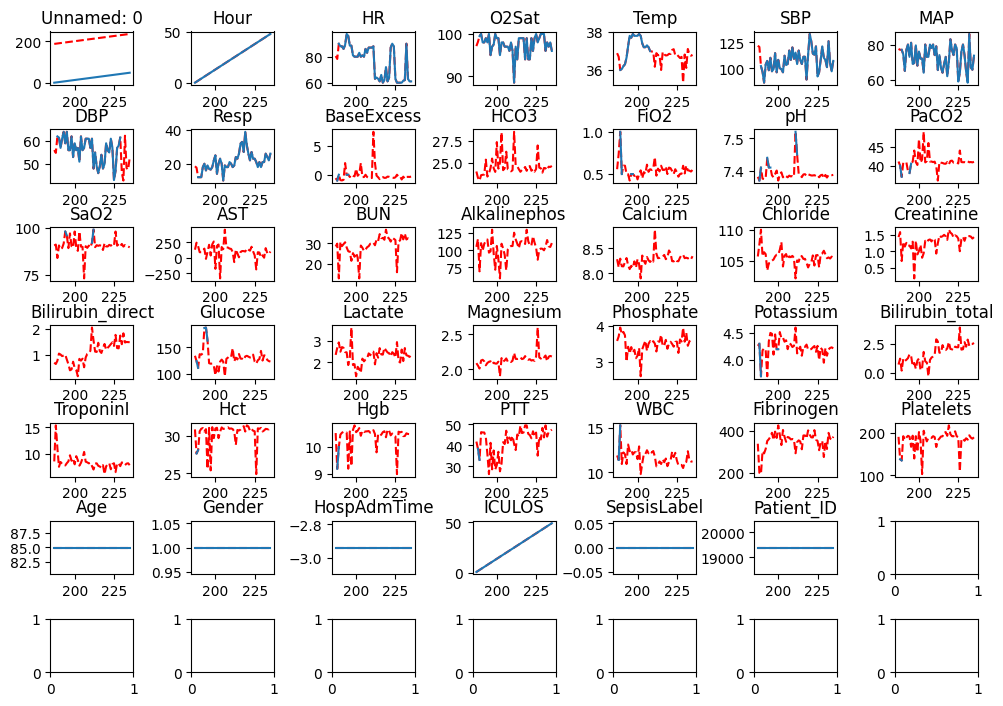

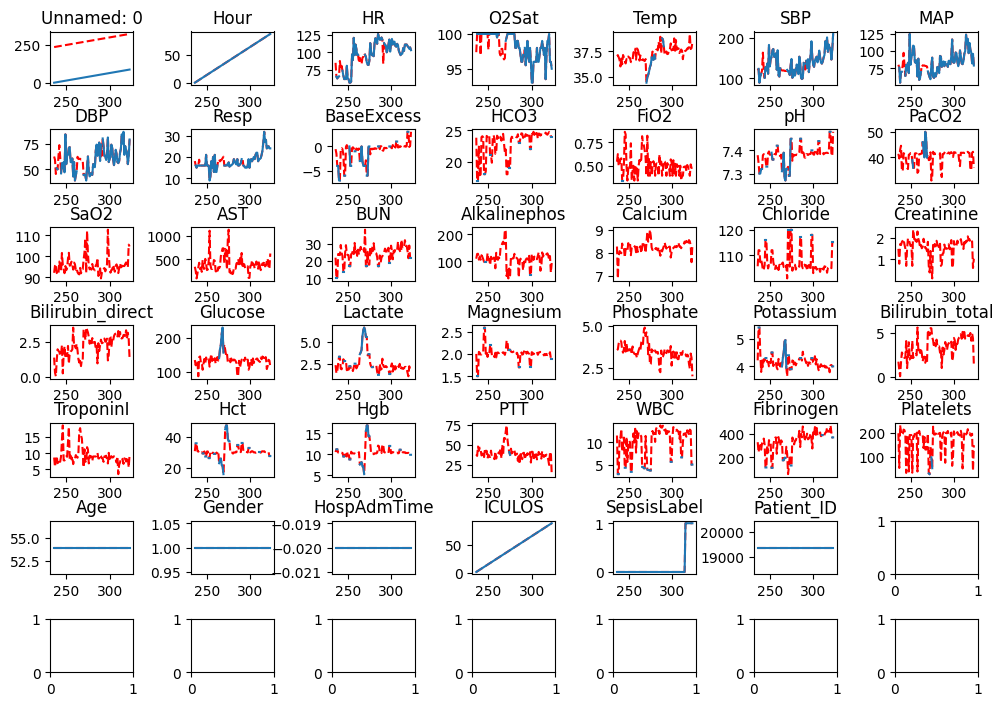

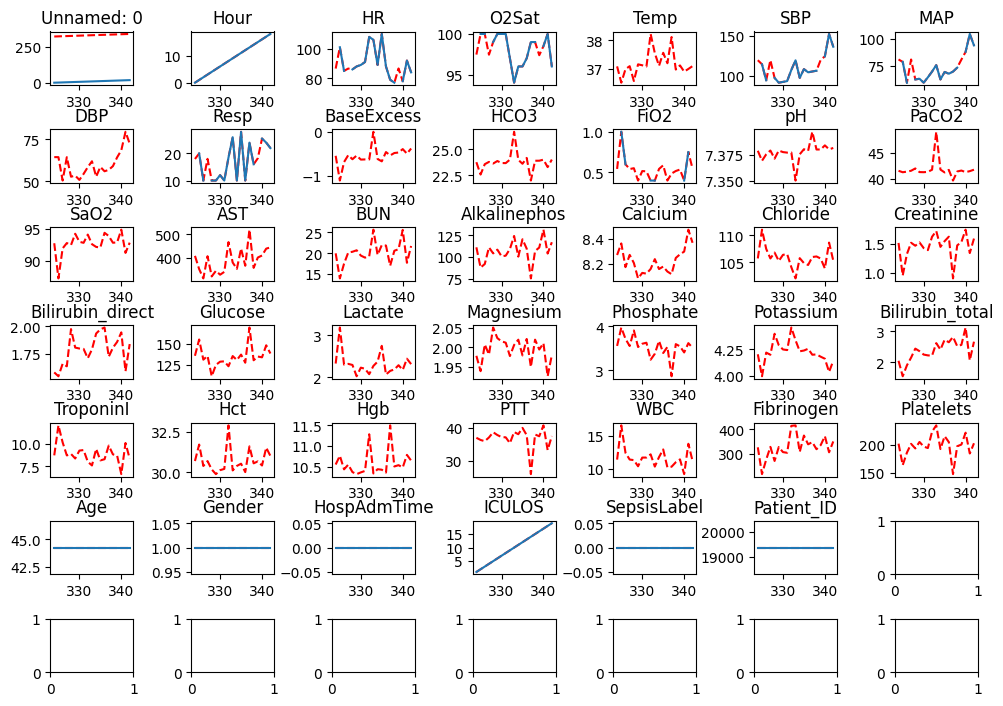

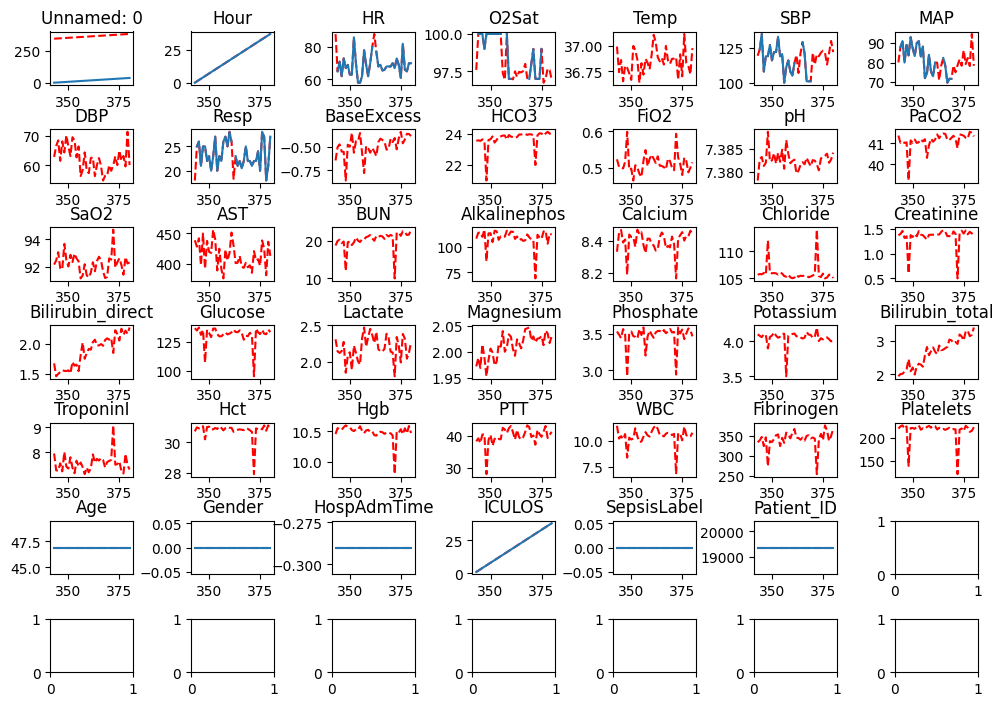

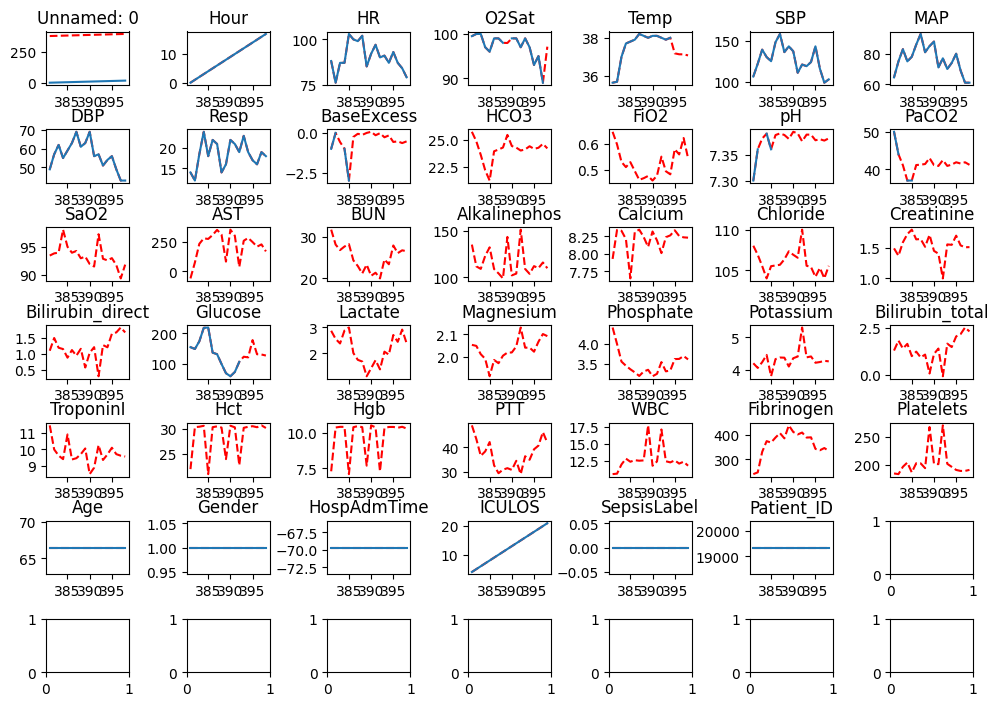

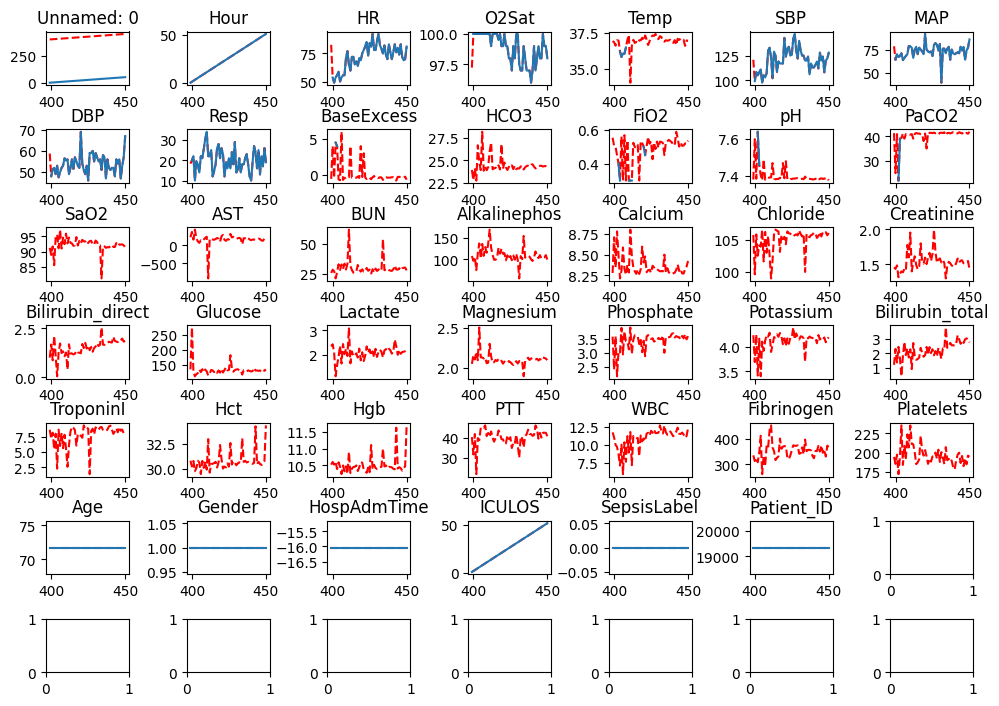

In [18]:
patients = imputed_data['Patient_ID'].unique()
counter = 0
feature = 'Calcium'
for p in patients:
    plot_imputed_patient(p)
    counter += 1
    if counter > 10:
        break